# BETA = 0.005

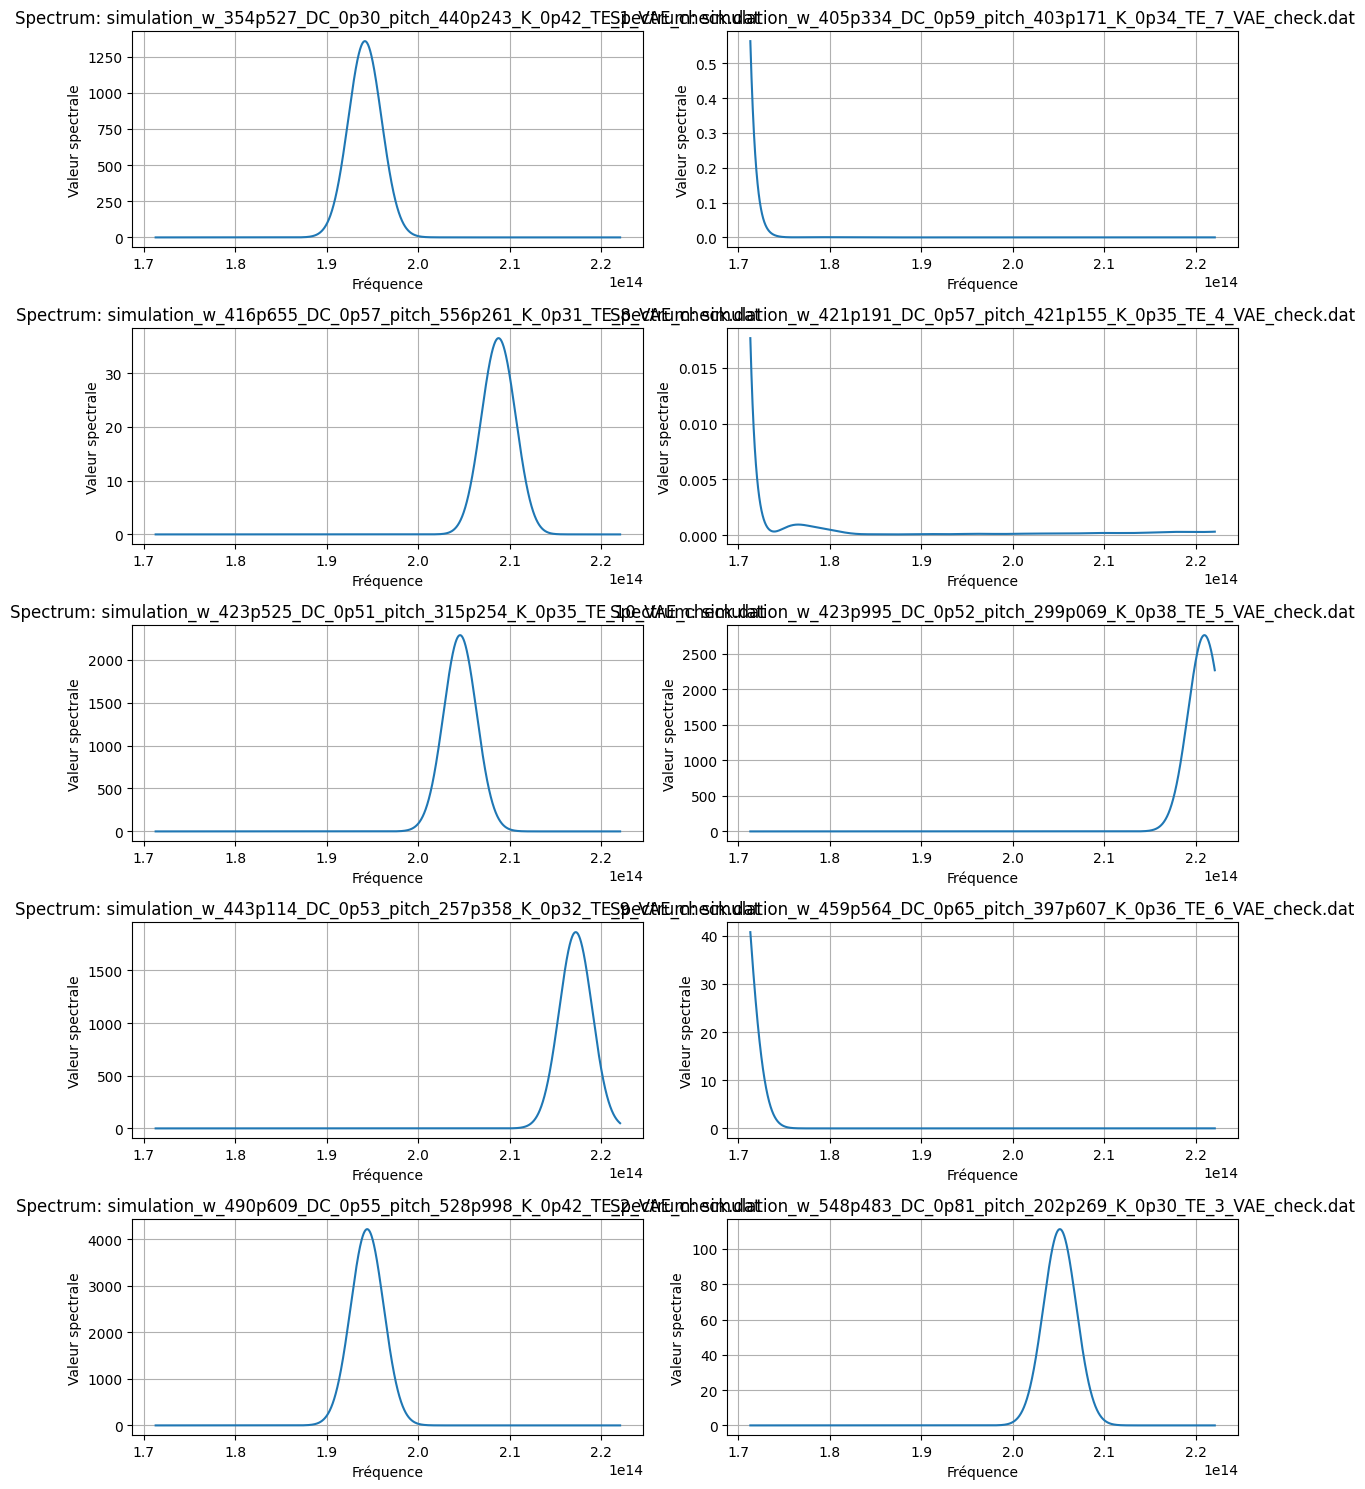

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

folder = "fdtd_results/0.005"
dat_files = [f for f in os.listdir(folder) if f.endswith('.dat')]

n = len(dat_files)
n_cols = 2
n_rows = int(np.ceil(n / n_cols))

plt.figure(figsize=(12, 3 * n_rows))
for i, filename in enumerate(dat_files):
    filepath = os.path.join(folder, filename)
    data = np.loadtxt(filepath, skiprows=1)
    freq = data[:, 0]
    y = data[:, 1]

    plt.subplot(n_rows, n_cols, i + 1)
    plt.plot(freq, y)
    plt.title(f"Spectrum: {filename}")
    plt.xlabel("Fréquence")
    plt.ylabel("Valeur spectrale")
    plt.grid(True)
    plt.tight_layout()
plt.show()

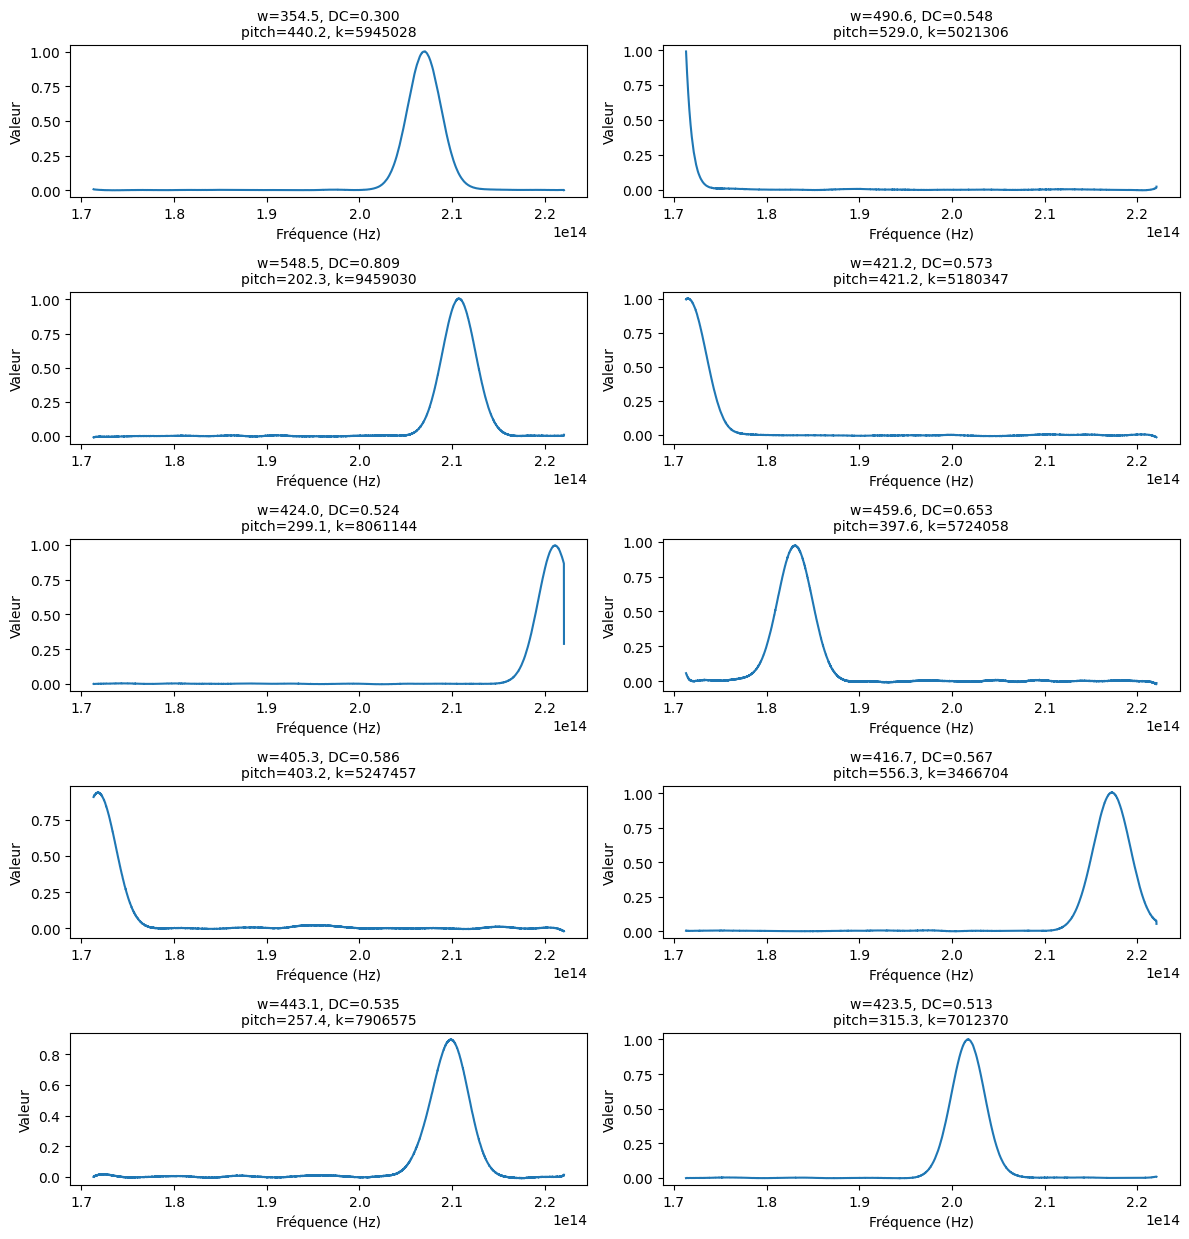

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Chargement du fichier CSV (sans header)
spectres = np.loadtxt('simulations/simulation_FDTD_spectres_0.005.csv', delimiter=',')

# Les 4 paramètres associés à chaque spectre (dans l'ordre)
params = np.array([
    [354.52698, 0.29972604, 440.24323, 5945028.5],
    [490.6094, 0.5481095, 528.9981, 5021306.5],
    [548.483, 0.8094312, 202.26923, 9459030],
    [421.19077, 0.57333416, 421.1547, 5180347],
    [423.99548, 0.5236985, 299.06915, 8061144],
    [459.56418, 0.6530835, 397.60654, 5724058.5],
    [405.3337, 0.58580333, 403.1714, 5247457],
    [416.65524, 0.56671065, 556.26135, 3466703.8],
    [443.11404, 0.53483, 257.3576, 7906575],
    [423.52502, 0.51314783, 315.25446, 7012369.5]
])

frequencies = np.linspace(171309976000000, 222068487407407, 5000)

n = spectres.shape[0]
n_cols = 2
n_rows = int(np.ceil(n / n_cols))

plt.figure(figsize=(12, 2.5 * n_rows))
for i in range(n):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.plot(frequencies, spectres[i])
    w, DC, pitch, k = params[i]
    plt.title(f"w={w:.1f}, DC={DC:.3f}\npitch={pitch:.1f}, k={k:.0f}", fontsize=10)
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Valeur")
    plt.tight_layout()
plt.show()

# BETA = 0.005

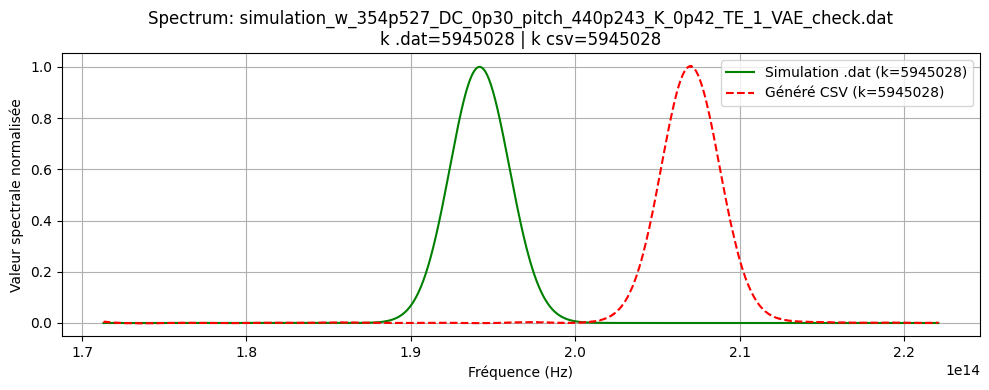

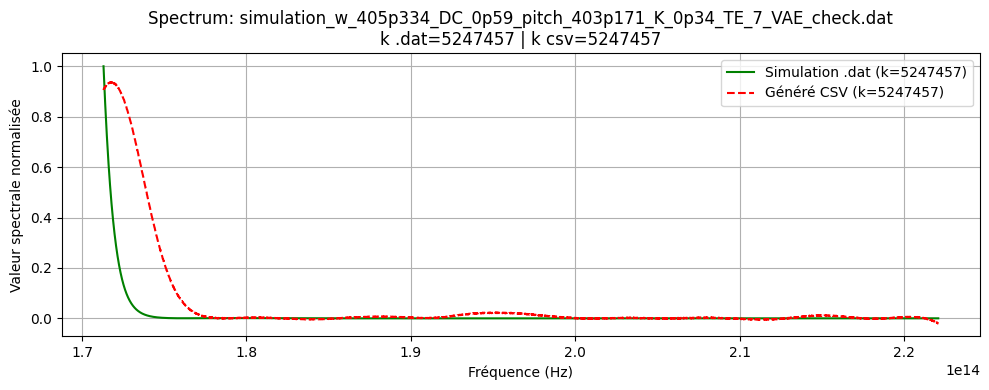

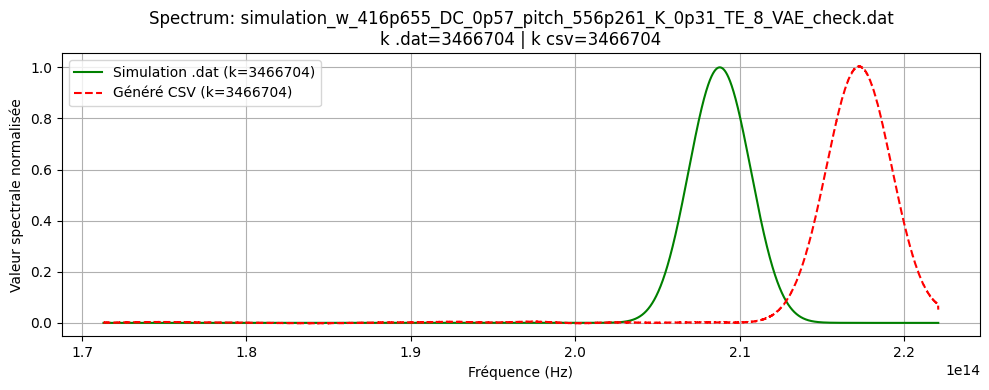

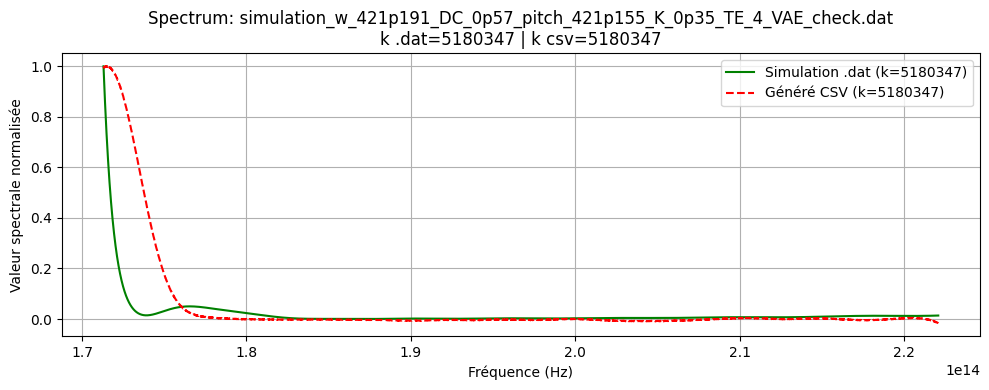

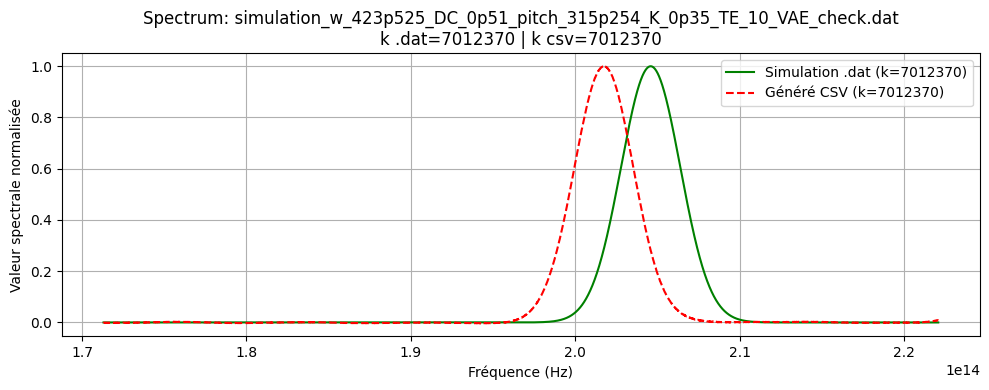

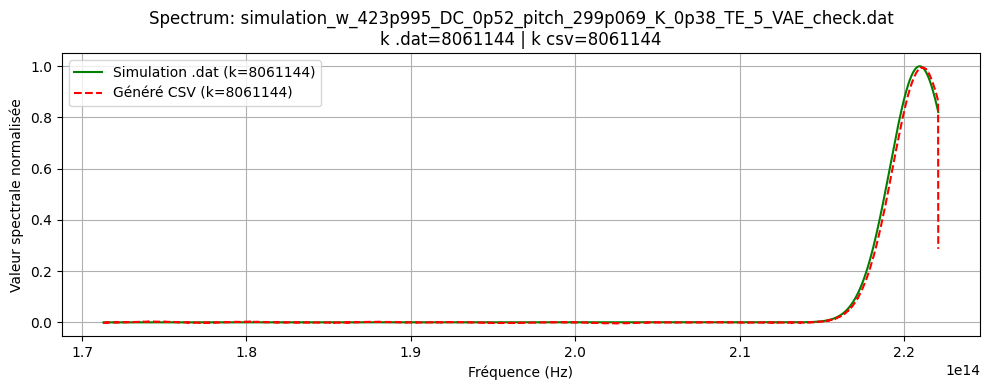

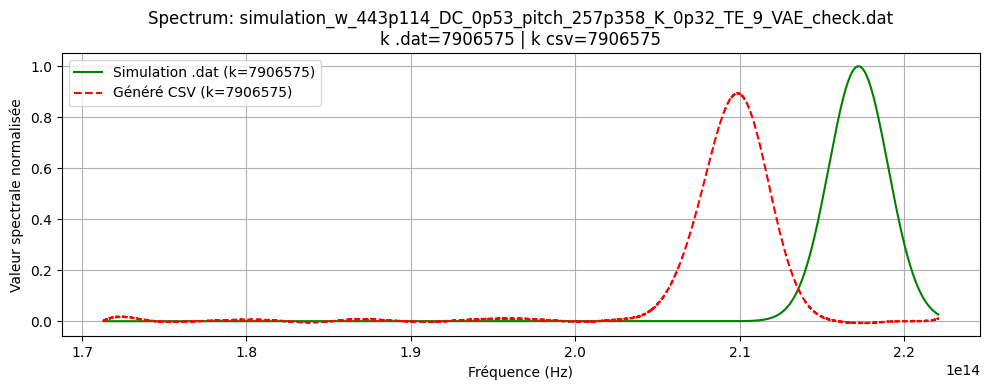

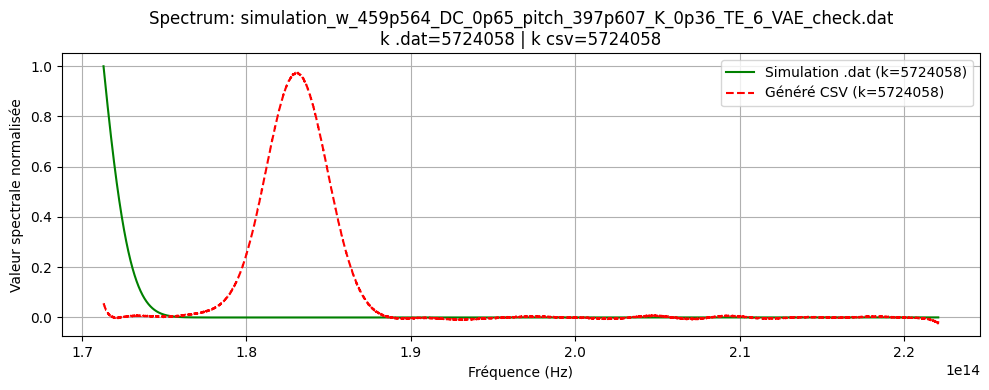

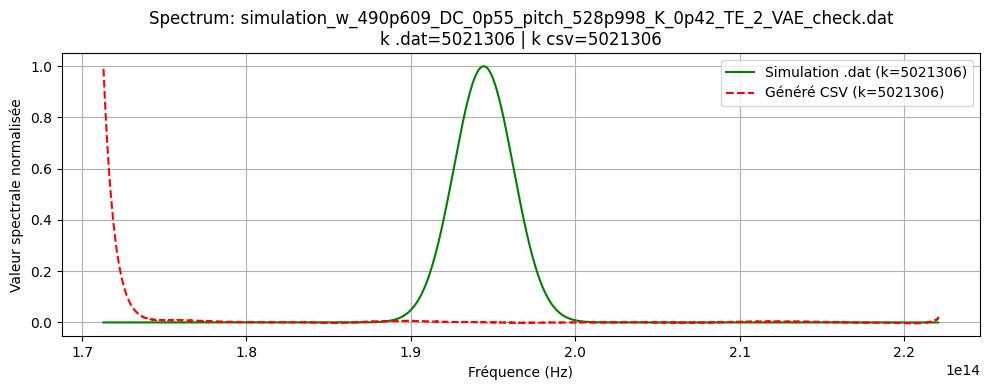

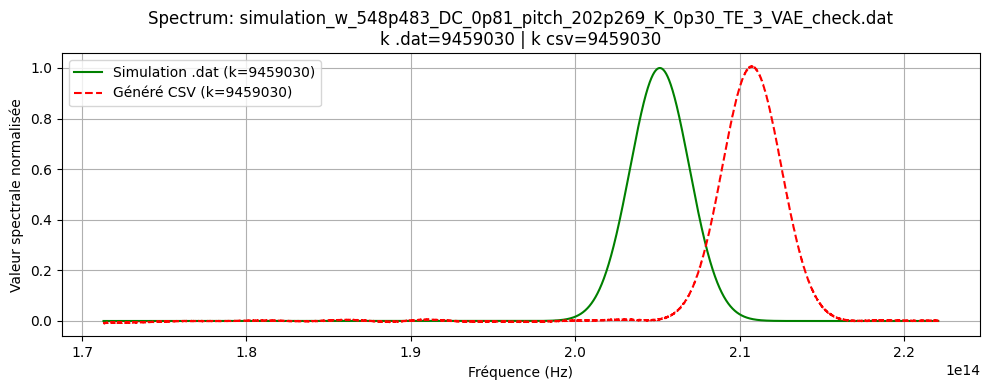

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Chargement des spectres générés et de leurs paramètres
spectres = np.loadtxt('simulations/simulation_FDTD_spectres_0.005.csv', delimiter=',')
params = np.array([
    [354.52698, 0.29972604, 440.24323, 5945028.5],
    [490.6094, 0.5481095, 528.9981, 5021306.5],
    [548.483, 0.8094312, 202.26923, 9459030],
    [421.19077, 0.57333416, 421.1547, 5180347],
    [423.99548, 0.5236985, 299.06915, 8061144],
    [459.56418, 0.6530835, 397.60654, 5724058.5],
    [405.3337, 0.58580333, 403.1714, 5247457],
    [416.65524, 0.56671065, 556.26135, 3466703.8],
    [443.11404, 0.53483, 257.3576, 7906575],
    [423.52502, 0.51314783, 315.25446, 7012369.5]
])
k_csv = params[:, 3]

# Liste des .dat
folder = "fdtd_results/0.005"
dat_files = sorted([f for f in os.listdir(folder) if f.endswith('.dat')])

frequencies = np.linspace(171309976000000, 222068487407407, 5000)

for i, filename in enumerate(dat_files):
    filepath = os.path.join(folder, filename)
    data = np.loadtxt(filepath, skiprows=1)
    freq = data[:, 0]
    y = data[:, 1]
    # Normalisation du spectre .dat entre 0 et 1
    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y) + 1e-12)
    # Récupère la valeur de k dans le .dat (première ligne, deuxième colonne)
    with open(filepath, 'r') as f:
        first_line = f.readline()
    k_dat = float(first_line.strip().split()[1])

    # Trouve l'indice du spectre généré ayant le k le plus proche
    idx_csv = np.argmin(np.abs(k_csv - k_dat))

    plt.figure(figsize=(10, 4))
    plt.plot(freq, y_norm, color='green', label=f'Simulation .dat (k={k_dat:.0f})')
    plt.plot(frequencies, spectres[idx_csv], color='red', linestyle='--', label=f'Généré CSV (k={k_csv[idx_csv]:.0f})')
    plt.title(f"Spectrum: {filename}\nk .dat={k_dat:.0f} | k csv={k_csv[idx_csv]:.0f}")
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Valeur spectrale normalisée")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# BETA = 0.05

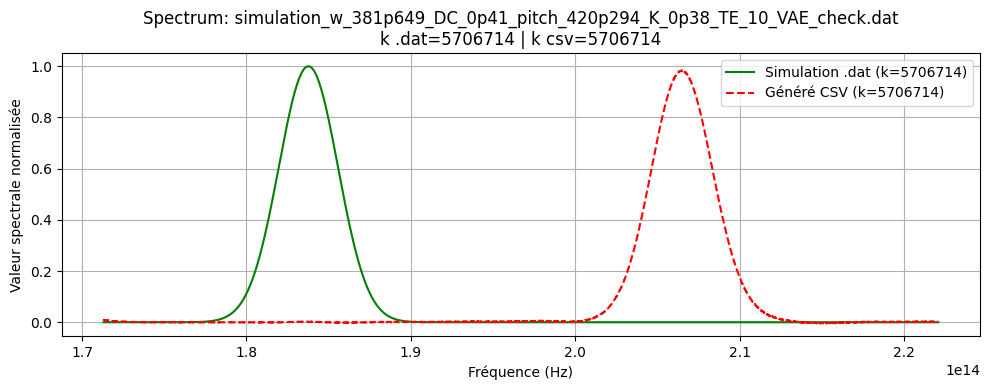

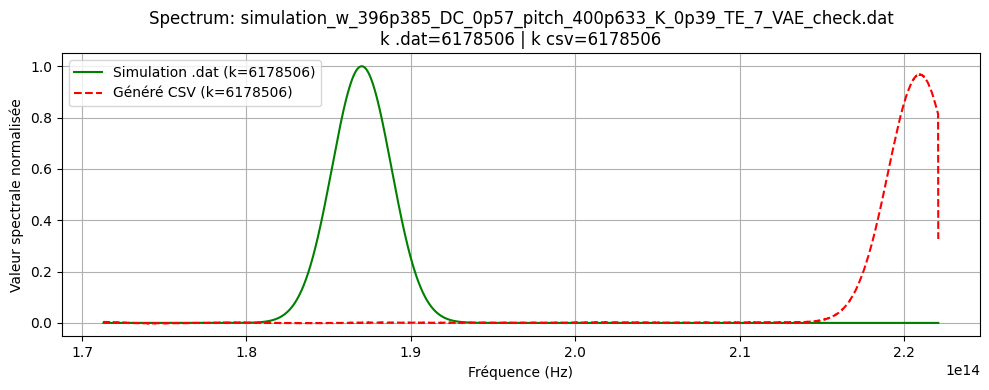

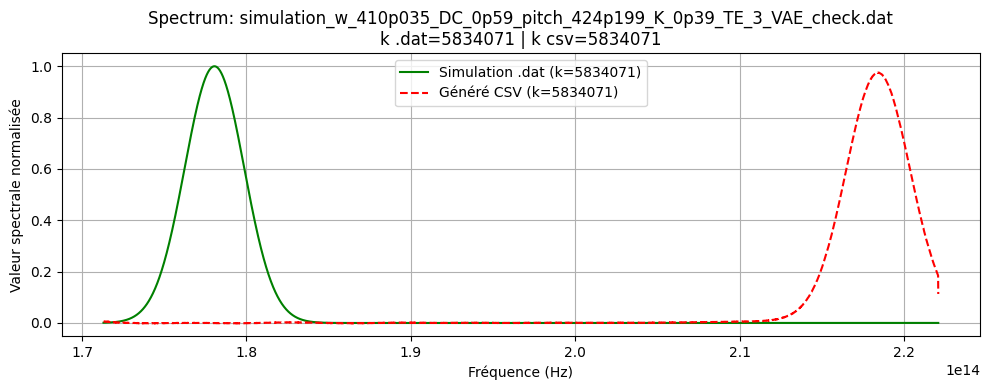

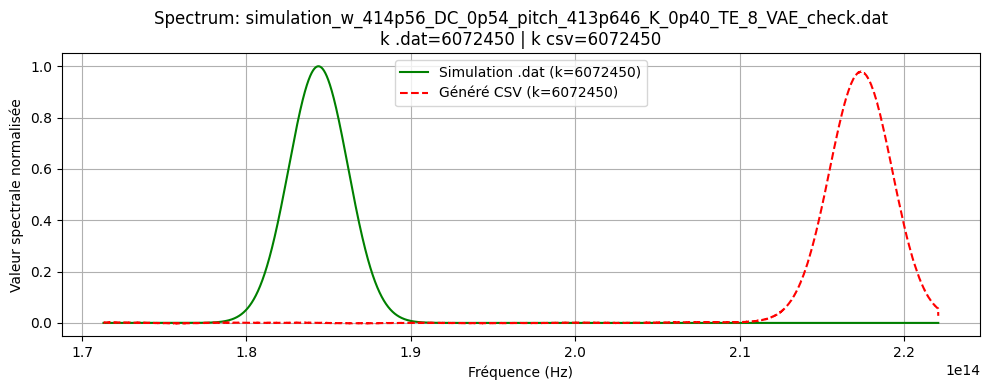

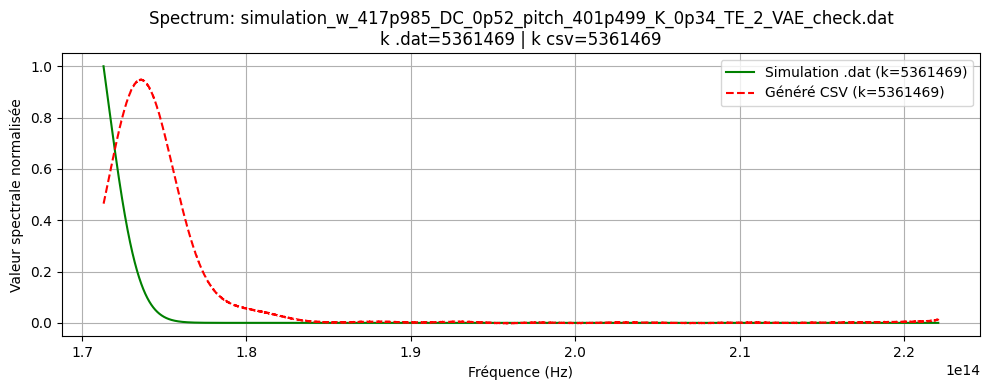

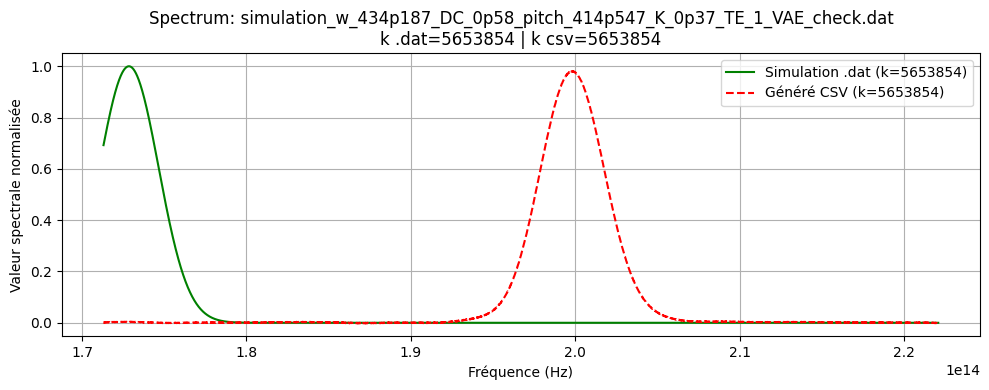

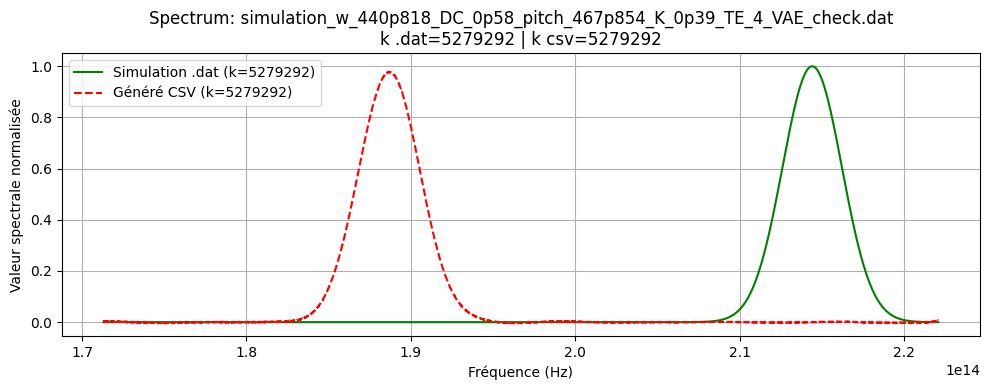

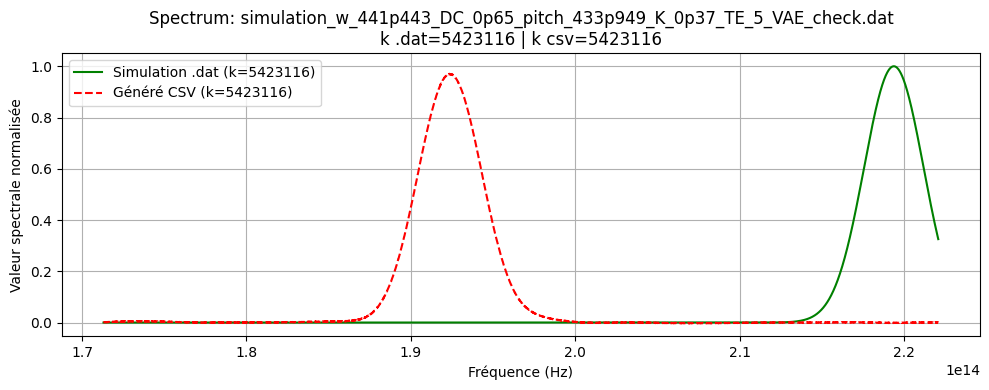

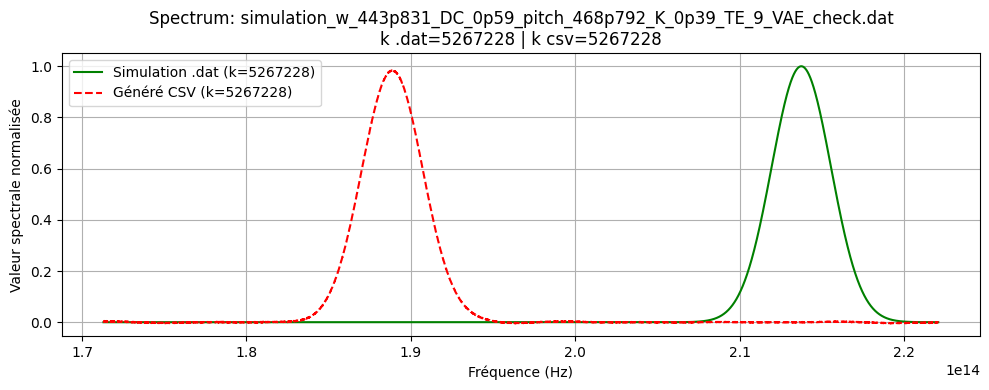

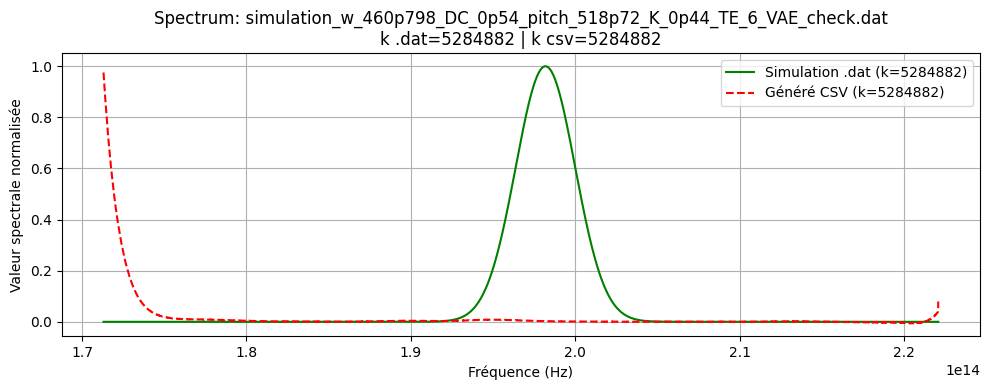

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Chargement des spectres générés et de leurs paramètres
spectres = np.loadtxt('simulations/simulation_FDTD_spectres_0.05.csv', delimiter=',')
params = np.array([
    [434.18707, 0.5804176, 414.5465, 5653854.5],
    [417.985, 0.5239348, 401.49863, 5361469],
    [410.03485, 0.5863465, 424.19885, 5834071],
    [440.81763, 0.58403283, 467.85397, 5279292],
    [441.4426, 0.6480763, 433.9493, 5423116.5],
    [460.79807, 0.5373118, 518.72003, 5284881.5],
    [396.38516, 0.5715488, 400.63278, 6178506.5],
    [414.55997, 0.54393667, 413.64642, 6072450],
    [443.83096, 0.58518285, 468.7924, 5267228.5],
    [381.64865, 0.4060564, 420.2944, 5706714.5]
])
k_csv = params[:, 3]

# Liste des .dat
folder = "fdtd_results/0.05"
dat_files = sorted([f for f in os.listdir(folder) if f.endswith('.dat')])

frequencies = np.linspace(171309976000000, 222068487407407, 5000)

for i, filename in enumerate(dat_files):
    filepath = os.path.join(folder, filename)
    data = np.loadtxt(filepath, skiprows=1)
    freq = data[:, 0]
    y = data[:, 1]
    # Normalisation du spectre .dat entre 0 et 1
    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y) + 1e-12)
    # Récupère la valeur de k dans le .dat (première ligne, deuxième colonne)
    with open(filepath, 'r') as f:
        first_line = f.readline()
    k_dat = float(first_line.strip().split()[1])

    # Trouve l'indice du spectre généré ayant le k le plus proche
    idx_csv = np.argmin(np.abs(k_csv - k_dat))

    plt.figure(figsize=(10, 4))
    plt.plot(freq, y_norm, color='green', label=f'Simulation .dat (k={k_dat:.0f})')
    plt.plot(frequencies, spectres[idx_csv], color='red', linestyle='--', label=f'Généré CSV (k={k_csv[idx_csv]:.0f})')
    plt.title(f"Spectrum: {filename}\nk .dat={k_dat:.0f} | k csv={k_csv[idx_csv]:.0f}")
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Valeur spectrale normalisée")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# BETA = 0.01

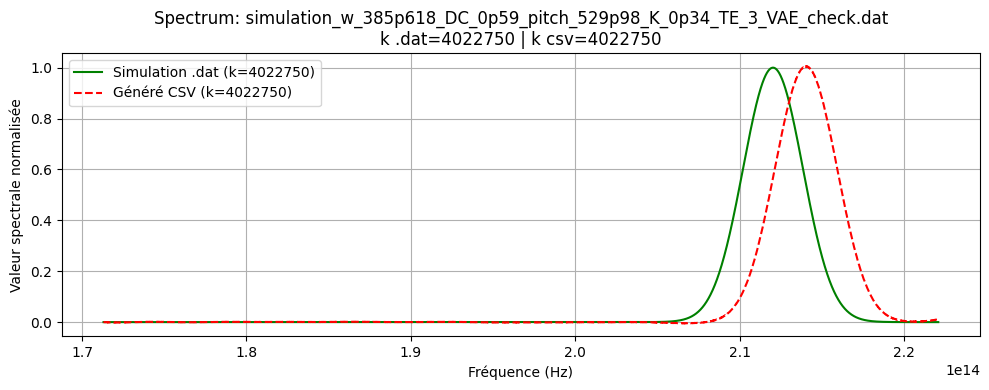

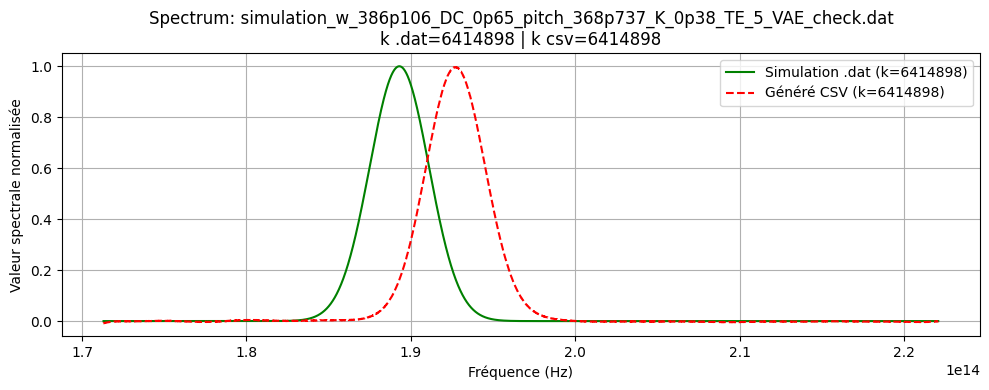

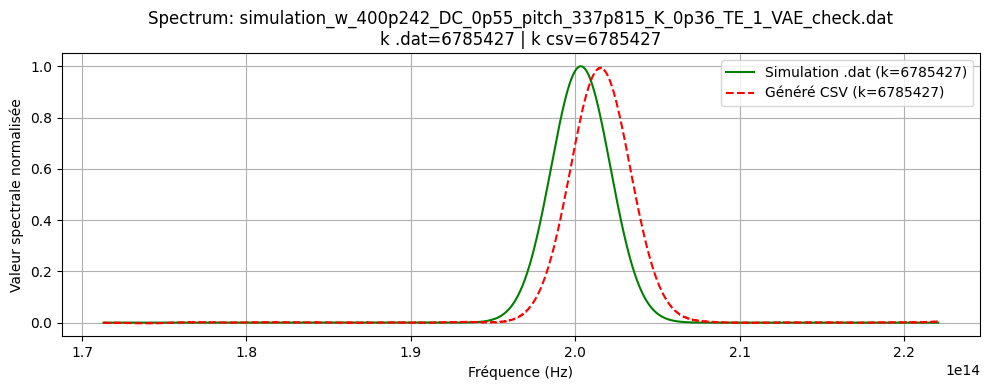

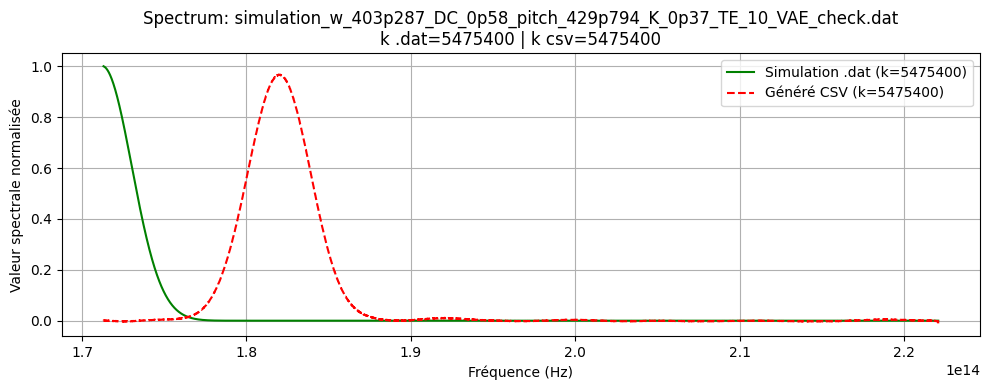

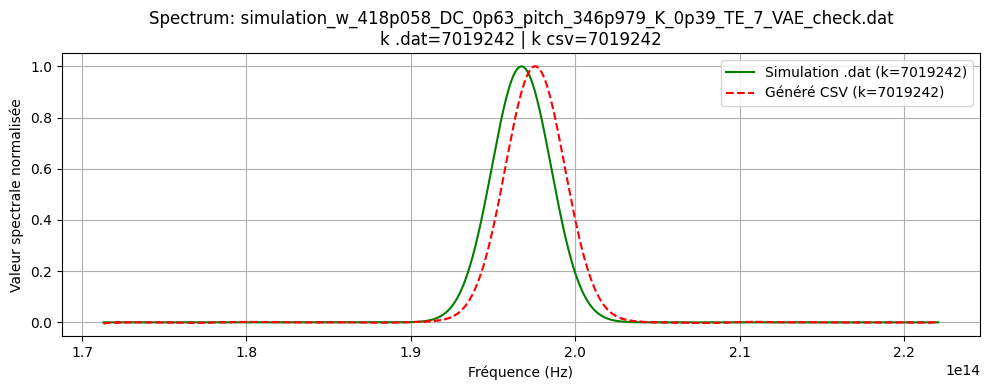

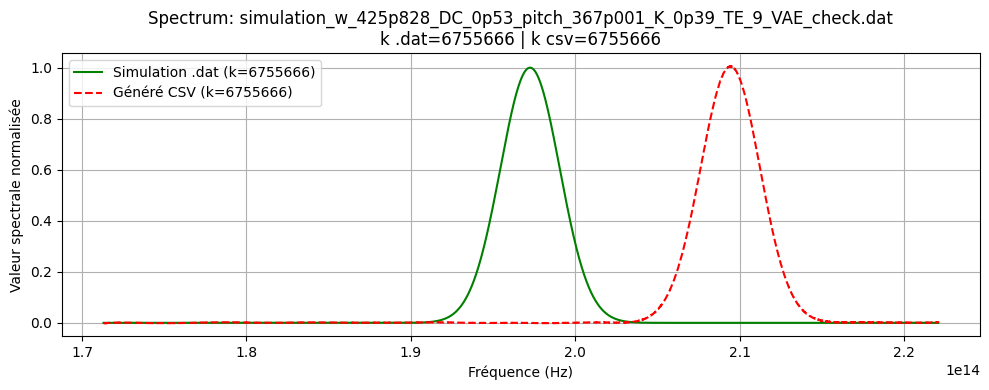

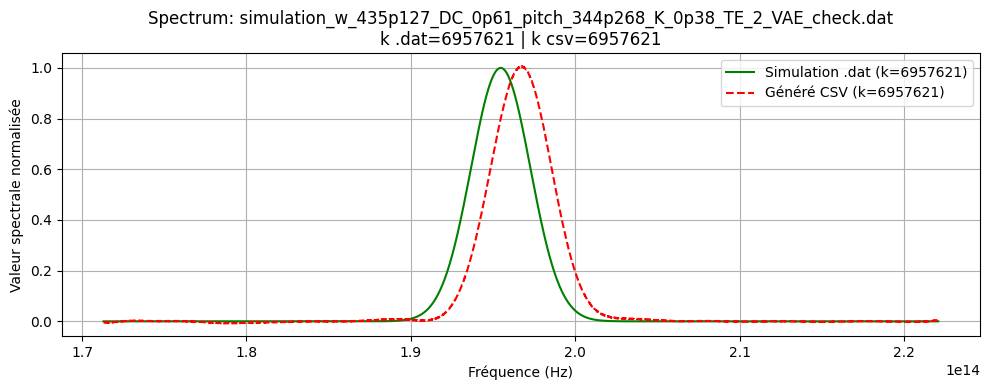

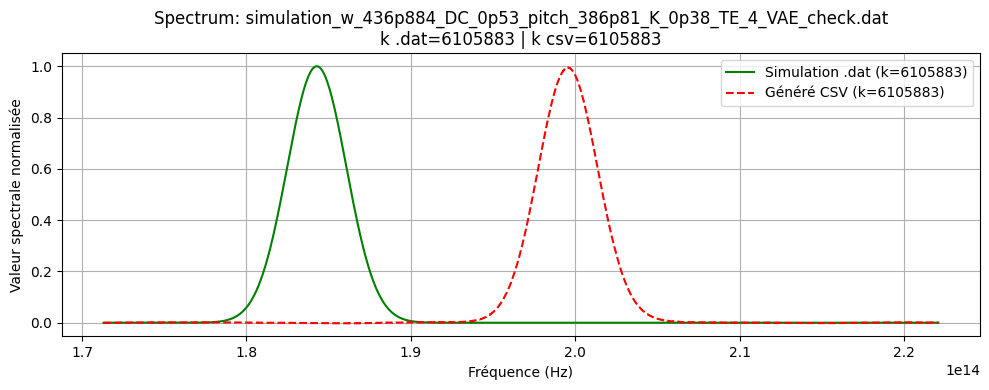

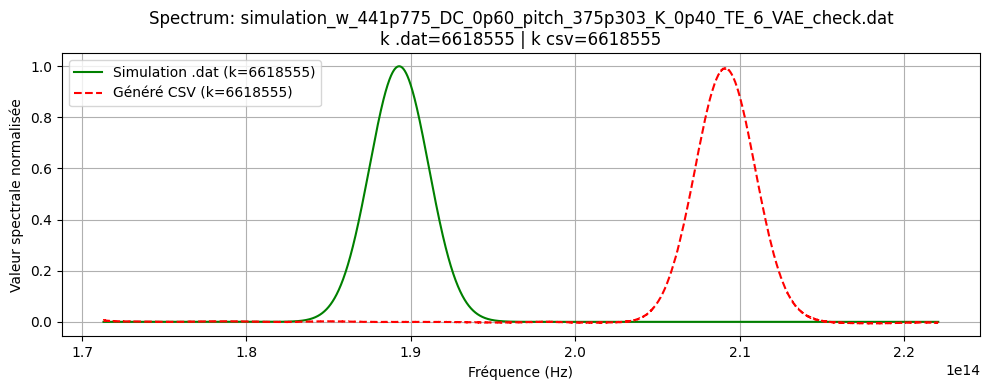

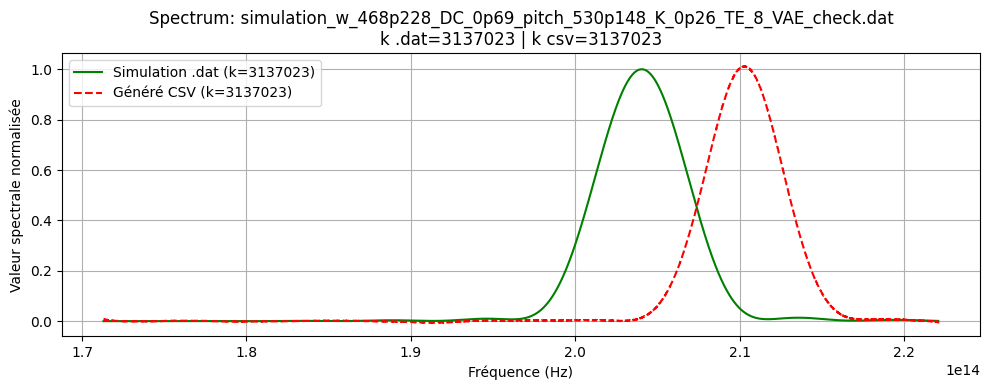

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Chargement des spectres générés et de leurs paramètres
spectres = np.loadtxt('simulations/simulation_FDTD_spectres_0.01.csv', delimiter=',')
params = np.array([
    [400.2424, 0.5486833, 337.81503, 6785427],
    [435.12704, 0.6096982, 344.26782, 6957621],
    [385.61786, 0.58879954, 529.98016, 4022750.5],
    [436.88397, 0.5277678, 386.80957, 6105883],
    [386.1056, 0.6505349, 368.7374, 6414898],
    [441.77487, 0.5996162, 375.30316, 6618555],
    [418.05753, 0.634123, 346.97916, 7019242],
    [468.2278, 0.68649125, 530.14825, 3137023],
    [425.8283, 0.5312015, 367.00085, 6755665.5],
    [403.2874, 0.58173156, 429.79376, 5475400]
])
k_csv = params[:, 3]

# Liste des .dat
folder = "fdtd_results/0.01"
dat_files = sorted([f for f in os.listdir(folder) if f.endswith('.dat')])

frequencies = np.linspace(171309976000000, 222068487407407, 5000)

for i, filename in enumerate(dat_files):
    filepath = os.path.join(folder, filename)
    data = np.loadtxt(filepath, skiprows=1)
    freq = data[:, 0]
    y = data[:, 1]
    # Normalisation du spectre .dat entre 0 et 1
    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y) + 1e-12)
    # Récupère la valeur de k dans le .dat (première ligne, deuxième colonne)
    with open(filepath, 'r') as f:
        first_line = f.readline()
    k_dat = float(first_line.strip().split()[1])

    # Trouve l'indice du spectre généré ayant le k le plus proche
    idx_csv = np.argmin(np.abs(k_csv - k_dat))

    plt.figure(figsize=(10, 4))
    plt.plot(freq, y_norm, color='green', label=f'Simulation .dat (k={k_dat:.0f})')
    plt.plot(frequencies, spectres[idx_csv], color='red', linestyle='--', label=f'Généré CSV (k={k_csv[idx_csv]:.0f})')
    plt.title(f"Spectrum: {filename}\nk .dat={k_dat:.0f} | k csv={k_csv[idx_csv]:.0f}")
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Valeur spectrale normalisée")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# BETA = 0.1

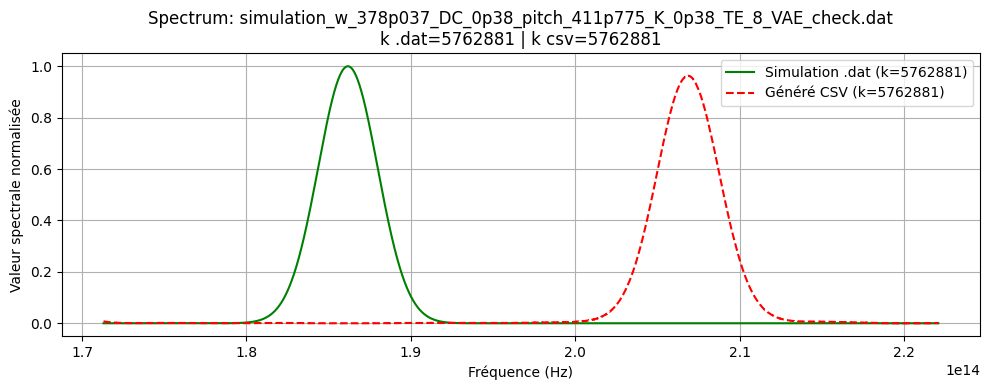

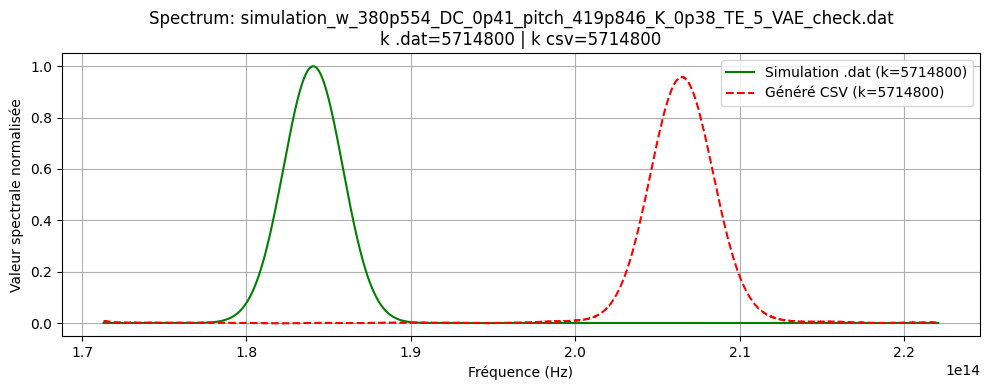

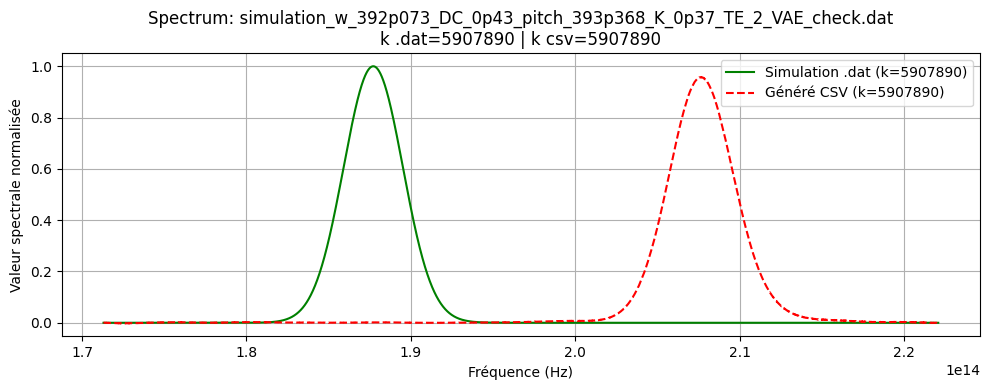

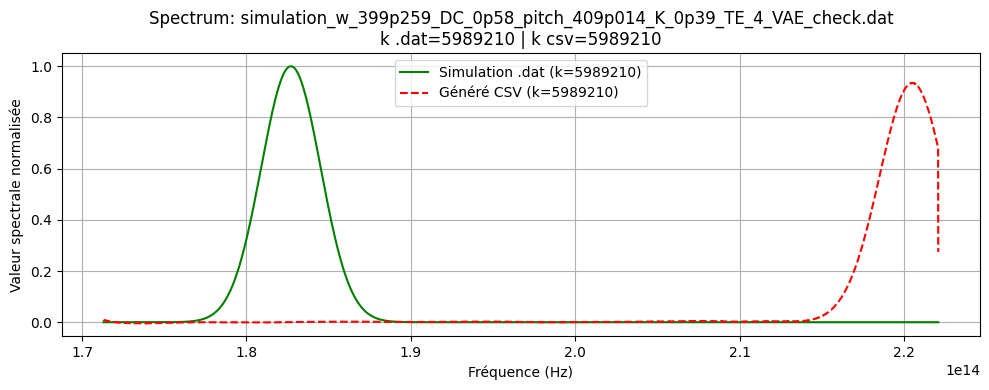

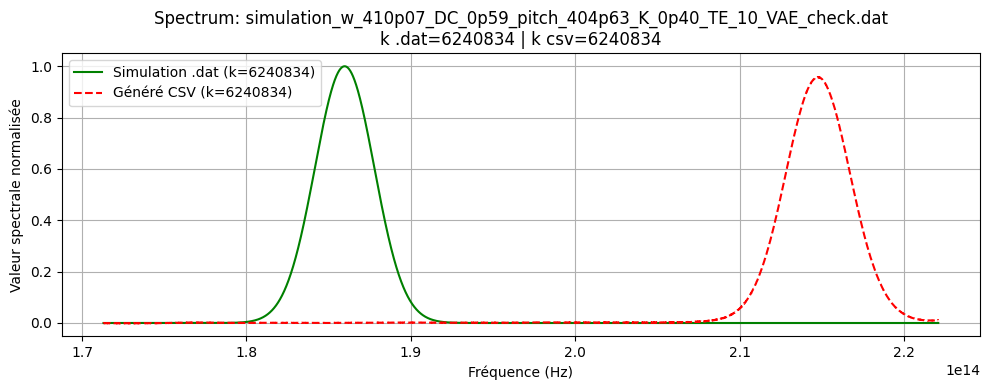

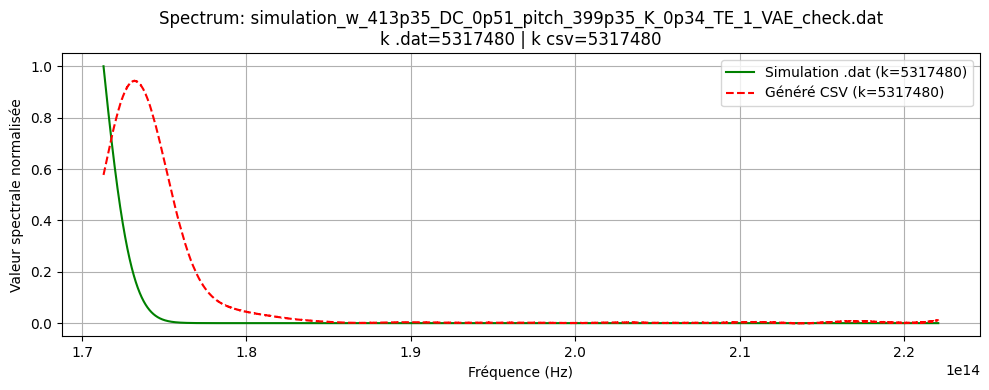

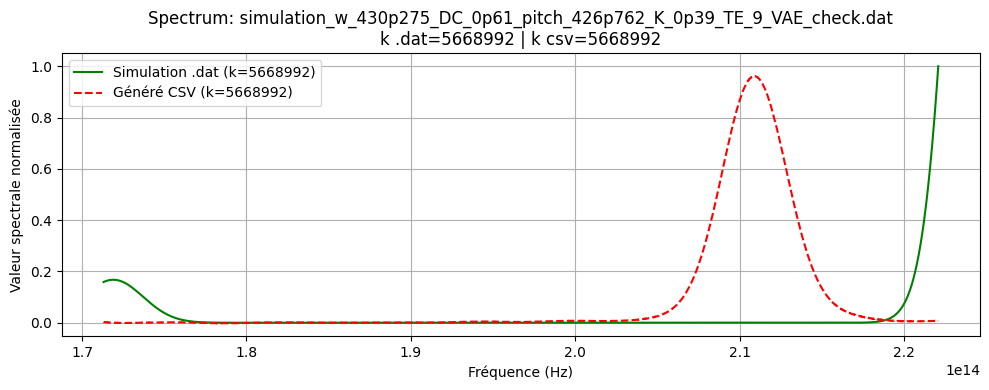

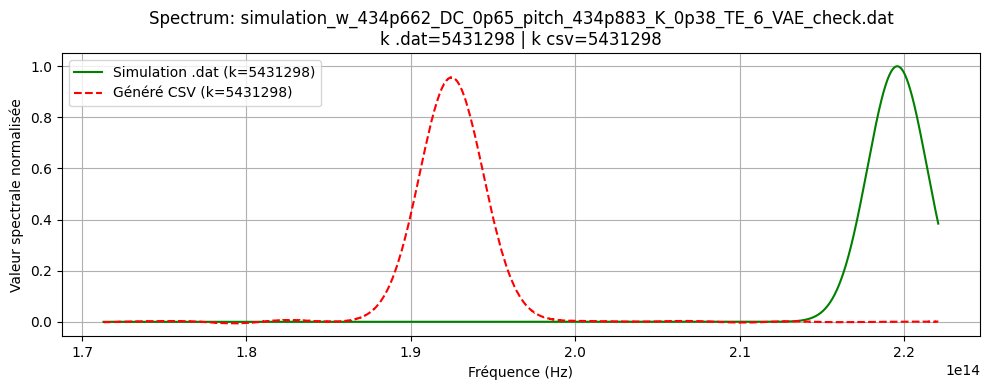

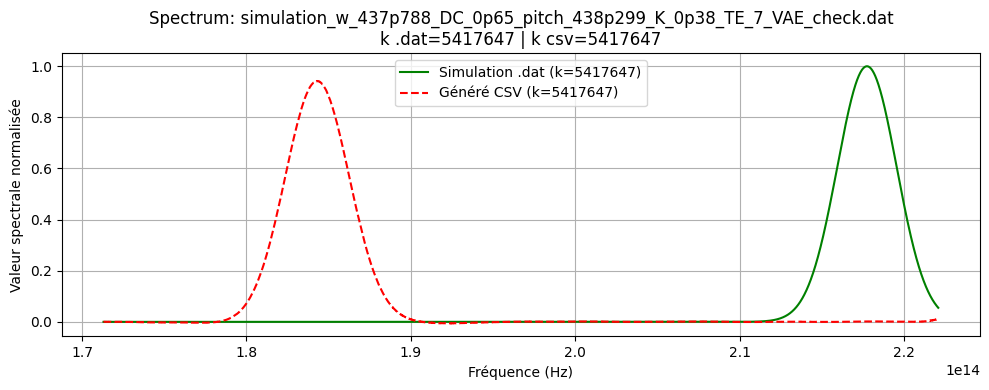

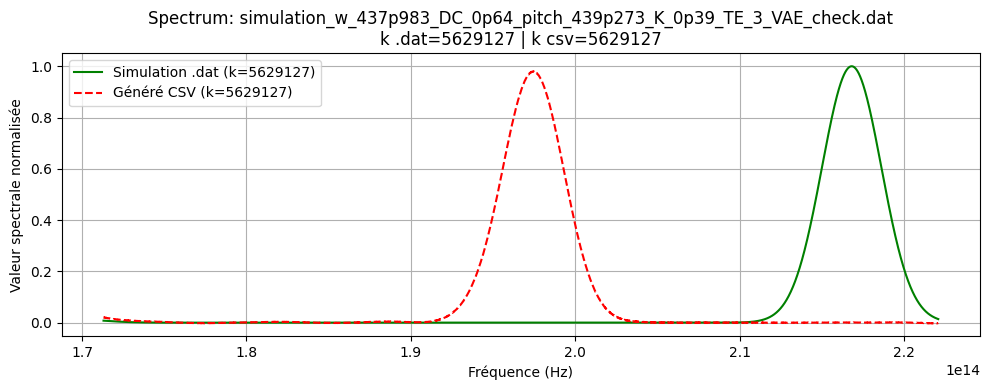

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Chargement des spectres générés et de leurs paramètres
spectres = np.loadtxt('simulations/simulation_FDTD_spectres_0.1.csv', delimiter=',')
params = np.array([
    [413.35, 0.5134884, 399.34973, 5317479.5],
    [392.07285, 0.4294763, 393.36804, 5907890.5],
    [437.98337, 0.63575596, 439.27307, 5629127],
    [399.25934, 0.5769835, 409.014, 5989209.5],
    [380.5543, 0.40528697, 419.8462, 5714799.5],
    [434.66165, 0.6480928, 434.8833, 5431298.5],
    [437.78827, 0.65034115, 438.29898, 5417647],
    [378.03735, 0.3844574, 411.77472, 5762881],
    [430.2753, 0.61425745, 426.76157, 5668992],
    [410.06998, 0.58608, 404.62958, 6240834.5]
])
k_csv = params[:, 3]

# Liste des .dat
folder = "fdtd_results/0.1"
dat_files = sorted([f for f in os.listdir(folder) if f.endswith('.dat')])

frequencies = np.linspace(171309976000000, 222068487407407, 5000)

for i, filename in enumerate(dat_files):
    filepath = os.path.join(folder, filename)
    data = np.loadtxt(filepath, skiprows=1)
    freq = data[:, 0]
    y = data[:, 1]
    # Normalisation du spectre .dat entre 0 et 1
    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y) + 1e-12)
    # Récupère la valeur de k dans le .dat (première ligne, deuxième colonne)
    with open(filepath, 'r') as f:
        first_line = f.readline()
    k_dat = float(first_line.strip().split()[1])

    # Trouve l'indice du spectre généré ayant le k le plus proche
    idx_csv = np.argmin(np.abs(k_csv - k_dat))

    plt.figure(figsize=(10, 4))
    plt.plot(freq, y_norm, color='green', label=f'Simulation .dat (k={k_dat:.0f})')
    plt.plot(frequencies, spectres[idx_csv], color='red', linestyle='--', label=f'Généré CSV (k={k_csv[idx_csv]:.0f})')
    plt.title(f"Spectrum: {filename}\nk .dat={k_dat:.0f} | k csv={k_csv[idx_csv]:.0f}")
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Valeur spectrale normalisée")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()